In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}


import xlsxwriter
import openpyxl
import pandas as pd
from matplotlib import rc
import matplotlib as mpl
import matplotlib.pyplot as plt

rc('font', family='Malgun Gothic')

import seaborn as sns

In [2]:
# 데이터불러오기

In [3]:
df_result = pd.read_excel("./Datas/df_result_merged.xlsx")
df_result

,Unnamed: 0,Unnamed: 0.1,Date_x,Daypart_x,Channel_x,Creative_x,Net Price,Audience,SPOT,I/B콜수,정기후원,후원금액,Category,Material,Asklevel,Model
0,0,0,2018-06-24,08시대,EDGETV,아동학대,128205.128205,12820.512821,1,2,1,20000,국내,아동학대,2만원,실제사례
1,1,4,2018-06-17,08시대,EDGETV,아동학대,128205.128205,12820.512821,1,1,1,20000,국내,아동학대,2만원,실제사례
2,2,12,2018-06-26,09시대,하이라이트,아동학대,41512.915129,4151.291513,1,0,0,0,국내,아동학대,2만원,실제사례
3,3,39,2018-06-16,09시대,하이라이트,아동학대,41512.915129,4151.291513,1,1,0,0,국내,아동학대,2만원,실제사례
4,4,40,2018-06-05,10시대,SKY트래블,아동학대,51071.598267,31113.000000,1,1,0,0,국내,아동학대,2만원,실제사례
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,64099,62917,2020-12-15,20시대,CNTV,안정환 조손가정,66666.666667,6666.666667,1,1,0,0,국내,생계비,2만원,셀럽
64100,64100,62918,2020-12-15,20시대,CNTV,안정환 조손가정,66666.666667,6666.666667,1,1,1,20000,국내,생계비,2만원,셀럽
64101,64101,62919,2020-12-15,20시대,CNTV,안정환 조손가정,66666.666667,6666.666667,1,1,0,0,국내,생계비,2만원,셀럽
64102,64102,62920,2020-12-15,20시대,CNTV,안정환 조손가정,66666.666667,6666.666667,1,1,0,0,국내,생계비,2만원,셀럽


In [4]:
# 데이터타입 확인하기
df_result.dtypes

Unnamed: 0               int64
Unnamed: 0.1             int64
Date_x          datetime64[ns]
Daypart_x               object
Channel_x               object
Creative_x              object
Net Price              float64
Audience               float64
SPOT                     int64
I/B콜수                    int64
정기후원                     int64
후원금액                     int64
Category                object
Material                object
Asklevel                object
Model                   object
dtype: object

In [5]:
# Unnamed: 0과 Unnamed:0.1 드롭
df_result = df_result.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [6]:
# 데이터타입을 바꿔주기 위해서 Net Price 명칭 변경
df_result = df_result.rename({'Net Price':'Net_Price',
                              'Date_x':'Date',
                              'Daypart_x':'Daypart',
                              'Channel_x':'Channel',
                              'Creative_x':'Creative',
                              'I/B콜수':'Inbound_Calls',
                              '정기후원':'Reg_Donour',
                              '후원금액':'RD_Amount'}, axis='columns')

In [7]:
# Audience와 Net_Price의 데이터타입을 int64로 변경
df_result['Audience'] = df_result.Audience.astype('int64')
df_result['Net_Price'] = df_result.Net_Price.astype('int64')

In [8]:
df_result.head()

,Date,Daypart,Channel,Creative,Net_Price,Audience,SPOT,Inbound_Calls,Reg_Donour,RD_Amount,Category,Material,Asklevel,Model
0,2018-06-24,08시대,EDGETV,아동학대,128205,12820,1,2,1,20000,국내,아동학대,2만원,실제사례
1,2018-06-17,08시대,EDGETV,아동학대,128205,12820,1,1,1,20000,국내,아동학대,2만원,실제사례
2,2018-06-26,09시대,하이라이트,아동학대,41512,4151,1,0,0,0,국내,아동학대,2만원,실제사례
3,2018-06-16,09시대,하이라이트,아동학대,41512,4151,1,1,0,0,국내,아동학대,2만원,실제사례
4,2018-06-05,10시대,SKY트래블,아동학대,51071,31113,1,1,0,0,국내,아동학대,2만원,실제사례


In [9]:
#df_result[(df_result['Audience']!=0) | (df_result['Net_Price']!=0) | (df_result['Inbound_Calls']!=0) | (df_result['RD_Amount']!=0)].info()

In [10]:
#df_result[(df_result['Audience']==0) & (df_result['Net_Price']==0) & (df_result['Inbound_Calls']==0) & (df_result['RD_Amount']==0)].info()

In [11]:
df_result["Daypart"].unique()

array(['08시대', '09시대', '10시대', '11시대', '12시대', '13시대', '14시대', '15시대',
       '16시대', '17시대', '18시대', '19시대', '20시대', '21시대', '23시대', '22시대',
       '07시대', '04시대', '02시대', '03시대', '05시대', '06시대', '01시대', '24시대'],
      dtype=object)

In [12]:
df_result["Daypart_Group"] = "d"

In [13]:
# 1. Early_Morning
df_result["Daypart_Group"][(df_result['Daypart'] == "08시대") | (df_result['Daypart'] == "09시대") | (df_result['Daypart'] == "10시대")]= "Early_morning"

In [14]:
# 2. Noon
df_result["Daypart_Group"][(df_result['Daypart'] == "11시대") | (df_result['Daypart'] == "12시대") | (df_result['Daypart'] == "13시대")] = "Noon"

In [15]:
# 3. Early_Afternoon
df_result["Daypart_Group"][(df_result['Daypart'] == "14시대") | (df_result['Daypart'] == "15시대") | (df_result['Daypart'] == "16시대")] = "Early_Afternoon"

In [16]:
# 4. Late_Afternoon
df_result["Daypart_Group"][(df_result['Daypart'] == "17시대") | (df_result['Daypart'] == "18시대") | (df_result['Daypart'] == "19시대")]="Late_Afternoon"

In [17]:
# 5. Midnight
df_result["Daypart_Group"][(df_result['Daypart'] == "20시대") | (df_result['Daypart'] == "21시대") | (df_result['Daypart'] == "22시대")]="Mid_night"

In [18]:
df_result

,Date,Daypart,Channel,Creative,Net_Price,Audience,SPOT,Inbound_Calls,Reg_Donour,RD_Amount,Category,Material,Asklevel,Model,Daypart_Group
0,2018-06-24,08시대,EDGETV,아동학대,128205,12820,1,2,1,20000,국내,아동학대,2만원,실제사례,Early_morning
1,2018-06-17,08시대,EDGETV,아동학대,128205,12820,1,1,1,20000,국내,아동학대,2만원,실제사례,Early_morning
2,2018-06-26,09시대,하이라이트,아동학대,41512,4151,1,0,0,0,국내,아동학대,2만원,실제사례,Early_morning
3,2018-06-16,09시대,하이라이트,아동학대,41512,4151,1,1,0,0,국내,아동학대,2만원,실제사례,Early_morning
4,2018-06-05,10시대,SKY트래블,아동학대,51071,31113,1,1,0,0,국내,아동학대,2만원,실제사례,Early_morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,2020-12-15,20시대,CNTV,안정환 조손가정,66666,6666,1,1,0,0,국내,생계비,2만원,셀럽,Mid_night
64100,2020-12-15,20시대,CNTV,안정환 조손가정,66666,6666,1,1,1,20000,국내,생계비,2만원,셀럽,Mid_night
64101,2020-12-15,20시대,CNTV,안정환 조손가정,66666,6666,1,1,0,0,국내,생계비,2만원,셀럽,Mid_night
64102,2020-12-15,20시대,CNTV,안정환 조손가정,66666,6666,1,1,0,0,국내,생계비,2만원,셀럽,Mid_night


### 기본컬럼만들기

In [55]:
col_default = pd.pivot_table(df_result, 
                     index = 'Date',
                     values = ['Net_Price','Audience','SPOT','Inbound_Calls','Reg_Donour', 'RD_Amount'],
                     aggfunc = ['sum']
                     )
col_default = col_default.astype("int")
col_default.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1053 entries, 2018-01-02 to 2020-12-15
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   (sum, Audience)       1053 non-null   int32
 1   (sum, Inbound_Calls)  1053 non-null   int32
 2   (sum, Net_Price)      1053 non-null   int32
 3   (sum, RD_Amount)      1053 non-null   int32
 4   (sum, Reg_Donour)     1053 non-null   int32
 5   (sum, SPOT)           1053 non-null   int32
dtypes: int32(6)
memory usage: 32.9 KB


In [56]:
col_def = col_default["sum"].reset_index()
col_def.head()

,Date,Audience,Inbound_Calls,Net_Price,RD_Amount,Reg_Donour,SPOT
0,2018-01-02,66914,13,733197,100000,3,7
1,2018-01-03,70638,6,381083,10000,1,5
2,2018-01-04,59670,19,788975,100000,5,12
3,2018-01-05,138597,13,1002145,100000,6,16
4,2018-01-06,324304,22,2436499,160000,8,23


### 추가컬럼1
- CPM : 1000명당 비용 | Net_price ÷ Adience * 1000
- Rating : 광고 1회당 평균시청자수 | Adience ÷ SPOT 
- ROI : 광고비 투입대비 후원금모금액 | 후원모금액*12개월 ÷ 광고비

In [74]:
col_def["CPM"] = round(col_def["Net_Price"]/col_def["Audience"]*1000,0)
col_def["Rate"] = round(col_def["Audience"]/col_def["SPOT"],0)
col_def["ROI"] = round(col_def["RD_Amount"]*12/col_def["Net_Price"],1)

In [75]:
col_def

,Date,Audience,Inbound_Calls,Net_Price,RD_Amount,Reg_Donour,SPOT,CPM,Rate,ROI
0,2018-01-02,66914,13,733197,100000,3,7,10957.0,9559.0,1.6
1,2018-01-03,70638,6,381083,10000,1,5,5395.0,14128.0,0.3
2,2018-01-04,59670,19,788975,100000,5,12,13222.0,4972.0,1.5
3,2018-01-05,138597,13,1002145,100000,6,16,7231.0,8662.0,1.2
4,2018-01-06,324304,22,2436499,160000,8,23,7513.0,14100.0,0.8
...,...,...,...,...,...,...,...,...,...,...
1048,2020-12-11,16280366,1982,113317738,11355000,562,1874,6960.0,8687.0,1.2
1049,2020-12-12,9720554,1937,111040683,10965000,540,1802,11423.0,5394.0,1.2
1050,2020-12-13,18978743,1920,114779339,10915000,538,1746,6048.0,10870.0,1.1
1051,2020-12-14,1973136,312,19733136,1780000,88,296,10001.0,6666.0,1.1


### 추가컬럼2
- 집행된채널의갯수
- 집행된소재의갯수

In [77]:
df_result.head(1)

,Date,Daypart,Channel,Creative,Net_Price,Audience,SPOT,Inbound_Calls,Reg_Donour,RD_Amount,Category,Material,Asklevel,Model,Daypart_Group
0,2018-06-24,08시대,EDGETV,아동학대,128205,12820,1,2,1,20000,국내,아동학대,2만원,실제사례,Early_morning


In [106]:
# 집행된채널의갯수
col2 = df_result[["Date", "Channel", "SPOT"]].groupby(by=['Date','Channel'], as_index=False).count()
col2['Count'] = col2["SPOT"]/col2["SPOT"]
col_ch_count = col2.groupby(by=['Date'], as_index=False).count()
col_ch_count = col_ch_count[["Date", "Channel"]]
col_ch_count

,Date,Channel
0,2018-01-02,5
1,2018-01-03,4
2,2018-01-04,5
3,2018-01-05,7
4,2018-01-06,6
...,...,...
1048,2020-12-11,11
1049,2020-12-12,9
1050,2020-12-13,12
1051,2020-12-14,1


In [108]:
# 집행된소재의갯수
col3 = df_result[["Date", "Creative", "SPOT"]].groupby(by=['Date','Creative'], as_index=False).count()
col3['Count'] = col3["SPOT"]/col2["SPOT"]
col_cr_count = col3.groupby(by=['Date'], as_index=False).count()
col_cr_count = col_cr_count[["Date", "Creative"]]
col_cr_count

,Date,Creative
0,2018-01-02,3
1,2018-01-03,3
2,2018-01-04,2
3,2018-01-05,3
4,2018-01-06,3
...,...,...
1048,2020-12-11,4
1049,2020-12-12,3
1050,2020-12-13,4
1051,2020-12-14,1


In [111]:
col_def["Ch_count"] = col_ch_count["Channel"]
col_def["Cr_count"] = col_cr_count["Creative"]

In [113]:
col_def.head(1)

,Date,Audience,Inbound_Calls,Net_Price,RD_Amount,Reg_Donour,SPOT,CPM,Rate,ROI,Ch_count,Cr_count
0,2018-01-02,66914,13,733197,100000,3,7,10957.0,9559.0,1.6,5,3


### 추가컬럼3
- 국내소재와 해외소재의비중

In [117]:
col3 = pd.pivot_table(df_result, 
                     index = 'Date',
                     columns = 'Category',
                     values = 'Audience',
                     aggfunc = ['sum']
                     )
#col3 = col3.astype("int")
col3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1053 entries, 2018-01-02 to 2020-12-15
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   (sum, 국내)  963 non-null    float64
 1   (sum, 해외)  792 non-null    float64
dtypes: float64(2)
memory usage: 24.7 KB


In [125]:
col3_cate = col3["sum"].reset_index()
col_def["Cate_Ratio_Domestic"] = round(col3_cate["국내"]/(col3_cate["국내"]+col3_cate["해외"]),2)
col_def["Cate_Ratio_Global"] = round(col3_cate["해외"]/(col3_cate["국내"]+col3_cate["해외"]),2)

In [129]:
col_def.fillna(0)

,Date,Audience,Inbound_Calls,Net_Price,RD_Amount,Reg_Donour,SPOT,CPM,Rate,ROI,Ch_count,Cr_count,Cate_Ratio_Domestic,Cate_Ratio_Global
0,2018-01-02,66914,13,733197,100000,3,7,10957.0,9559.0,1.6,5,3,0.00,1.00
1,2018-01-03,70638,6,381083,10000,1,5,5395.0,14128.0,0.3,4,3,0.37,0.63
2,2018-01-04,59670,19,788975,100000,5,12,13222.0,4972.0,1.5,5,2,0.40,0.60
3,2018-01-05,138597,13,1002145,100000,6,16,7231.0,8662.0,1.2,7,3,0.04,0.96
4,2018-01-06,324304,22,2436499,160000,8,23,7513.0,14100.0,0.8,6,3,0.10,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,2020-12-11,16280366,1982,113317738,11355000,562,1874,6960.0,8687.0,1.2,11,4,0.96,0.04
1049,2020-12-12,9720554,1937,111040683,10965000,540,1802,11423.0,5394.0,1.2,9,3,0.00,0.00
1050,2020-12-13,18978743,1920,114779339,10915000,538,1746,6048.0,10870.0,1.1,12,4,0.96,0.04
1051,2020-12-14,1973136,312,19733136,1780000,88,296,10001.0,6666.0,1.1,1,1,0.00,0.00


In [130]:
col_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 1053 non-null   datetime64[ns]
 1   Audience             1053 non-null   int32         
 2   Inbound_Calls        1053 non-null   int32         
 3   Net_Price            1053 non-null   int32         
 4   RD_Amount            1053 non-null   int32         
 5   Reg_Donour           1053 non-null   int32         
 6   SPOT                 1053 non-null   int32         
 7   CPM                  1051 non-null   float64       
 8   Rate                 1053 non-null   float64       
 9   ROI                  1051 non-null   float64       
 10  Ch_count             1053 non-null   int64         
 11  Cr_count             1053 non-null   int64         
 12  Cate_Ratio_Domestic  702 non-null    float64       
 13  Cate_Ratio_Global    702 non-null

### 추가컬럼4
- 연령별 시청비중
- Reach, Reach3, Reach5+

In [132]:
rating = pd.read_excel("./Datas/TV_gra.xlsx")
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1078 non-null   datetime64[ns]
 1   In_Rating   1078 non-null   float64       
 2   In_Reach1+  1078 non-null   float64       
 3   In_Reach3+  1078 non-null   float64       
 4   In_Reach    1078 non-null   int64         
 5   F40_Reach   1078 non-null   int64         
 6   F50_Reach   1078 non-null   int64         
 7   F60_Reach   1078 non-null   int64         
 8   M60_Reach   1078 non-null   int64         
 9   M50_Reach   1078 non-null   int64         
 10  M40_Reach   1078 non-null   int64         
 11  F40_Ratio   1078 non-null   float64       
 12  F50_Ratio   1078 non-null   float64       
 13  F60_Ratio   1078 non-null   float64       
 14  M60_Ratio   1078 non-null   float64       
 15  M50_Ratio   1078 non-null   float64       
 16  M40_Ratio   1078 non-nul

In [133]:
df_fn = pd.merge(col_def, rating, on='Date', how='inner')

In [135]:
df_fn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1053 entries, 0 to 1052
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 1053 non-null   datetime64[ns]
 1   Audience             1053 non-null   int32         
 2   Inbound_Calls        1053 non-null   int32         
 3   Net_Price            1053 non-null   int32         
 4   RD_Amount            1053 non-null   int32         
 5   Reg_Donour           1053 non-null   int32         
 6   SPOT                 1053 non-null   int32         
 7   CPM                  1051 non-null   float64       
 8   Rate                 1053 non-null   float64       
 9   ROI                  1051 non-null   float64       
 10  Ch_count             1053 non-null   int64         
 11  Cr_count             1053 non-null   int64         
 12  Cate_Ratio_Domestic  702 non-null    float64       
 13  Cate_Ratio_Global    702 non-null

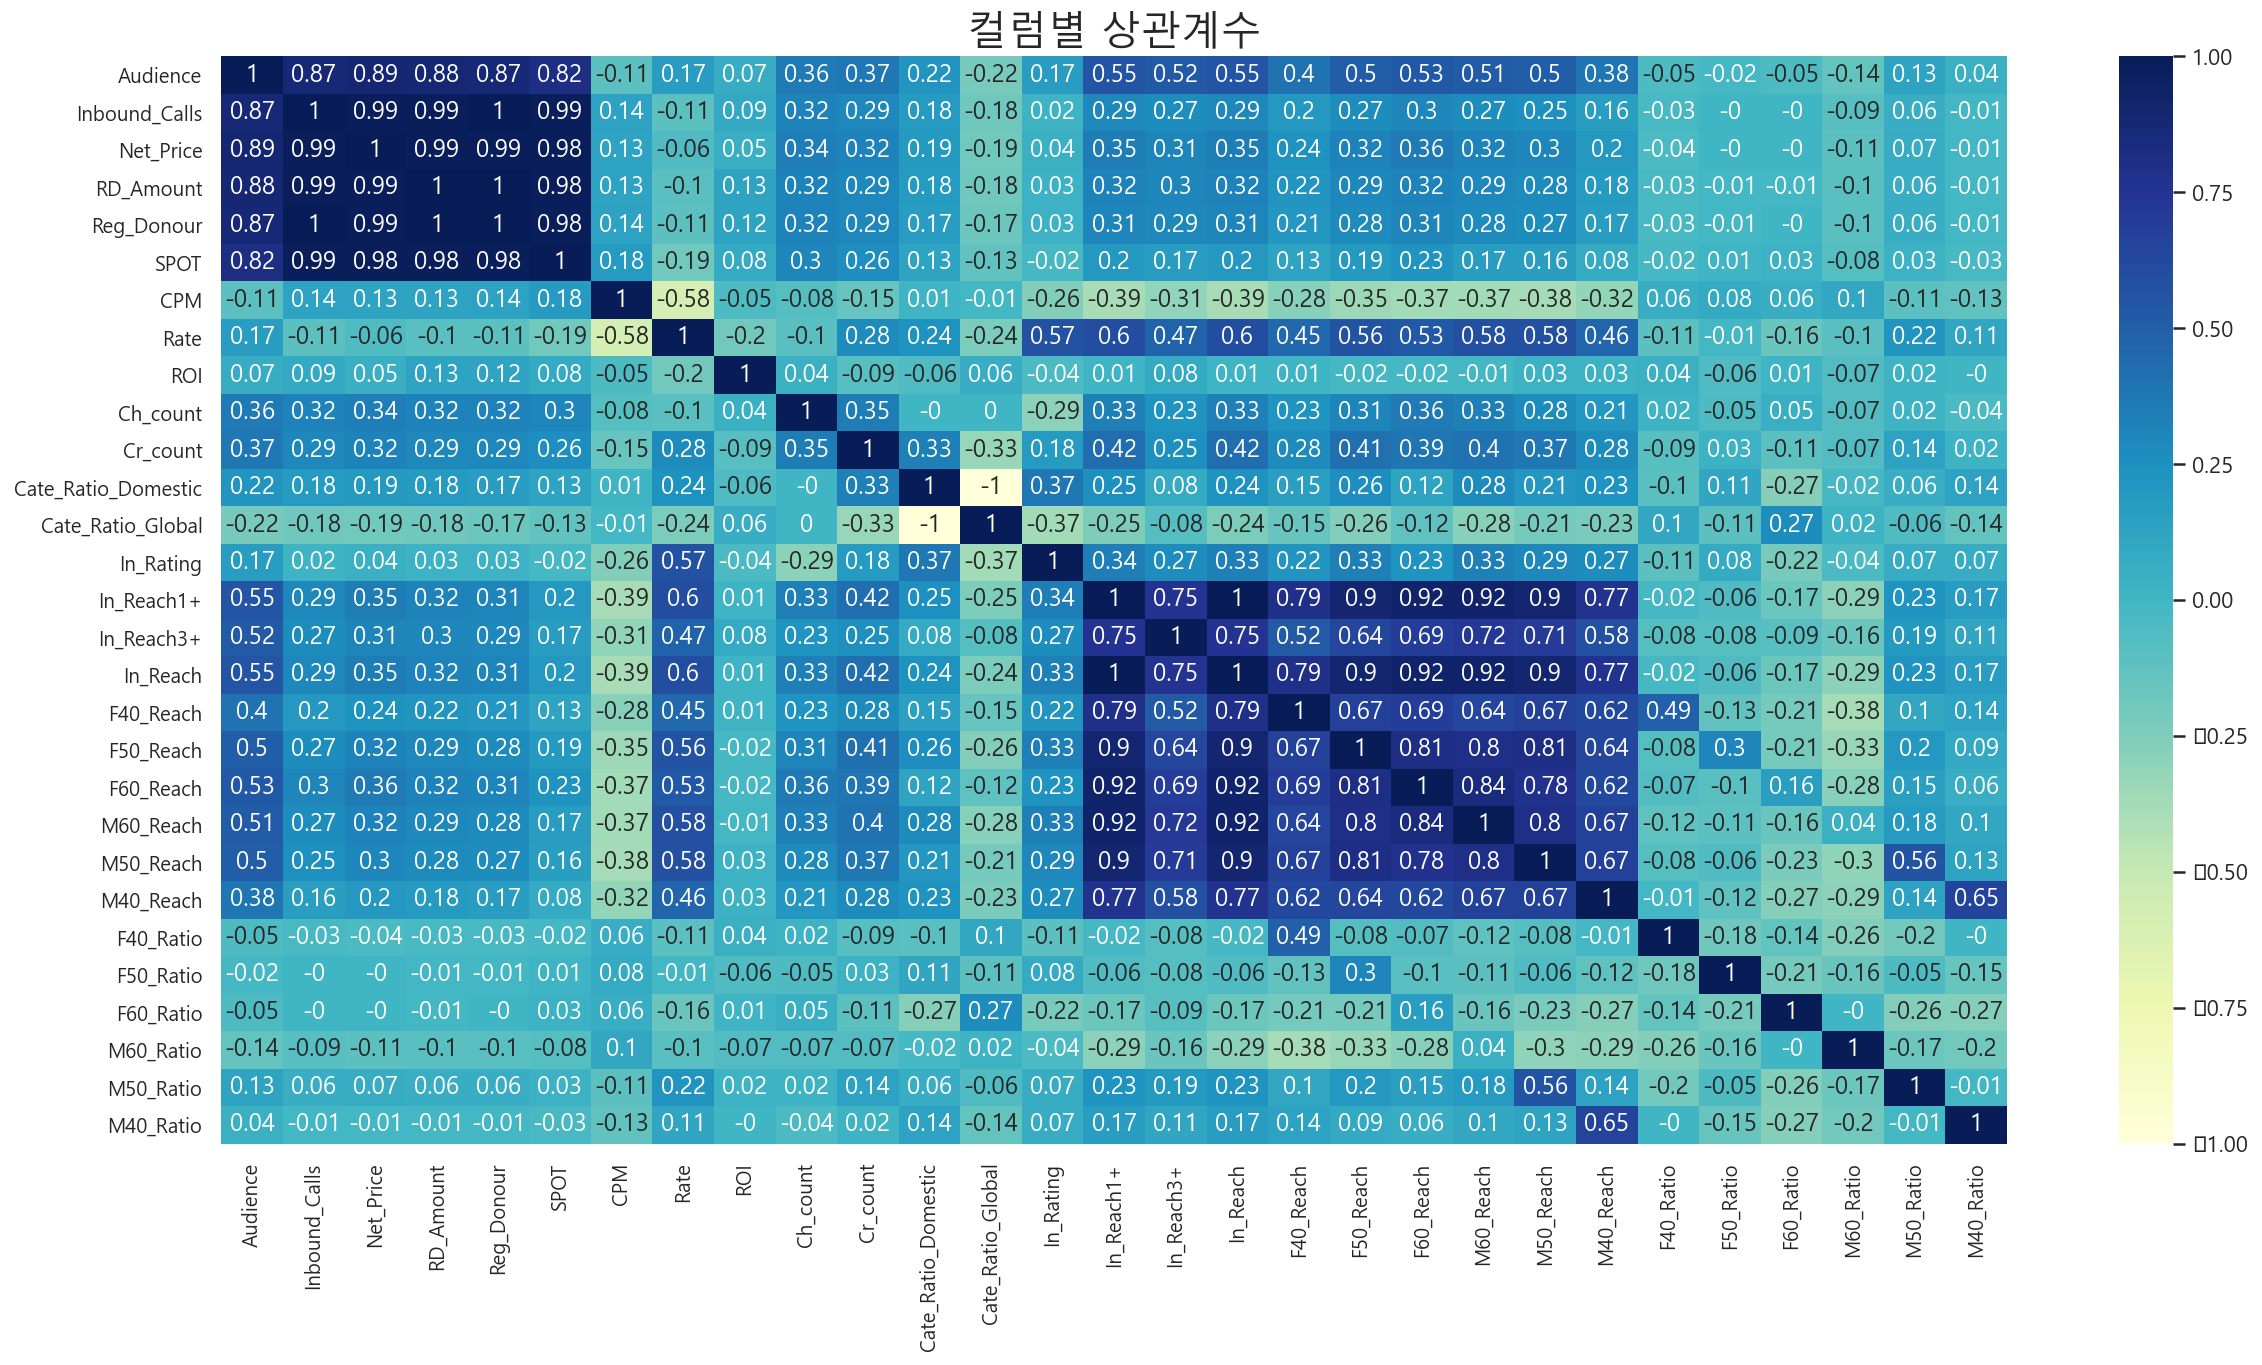

In [140]:
plt.figure(figsize=(20,10))
plt.title("컬럼별 상관계수", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.heatmap(data=round(df_fn.corr(),2), annot=True, cmap="YlGnBu", annot_kws={"size": 12})
plt.show()

In [141]:
rating2 = pd.read_excel("./Datas/TV_gra_age.xlsx")
rating2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1078 non-null   datetime64[ns]
 1   F40_Aud  1078 non-null   int64         
 2   F50_Aud  1078 non-null   int64         
 3   F60_Aud  1078 non-null   int64         
 4   M60_Aud  1078 non-null   int64         
 5   M50_Aud  1078 non-null   int64         
 6   M40_Aud  1078 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 59.1 KB


In [142]:
df_fn2 = pd.merge(df_fn, rating2, on='Date', how='inner')

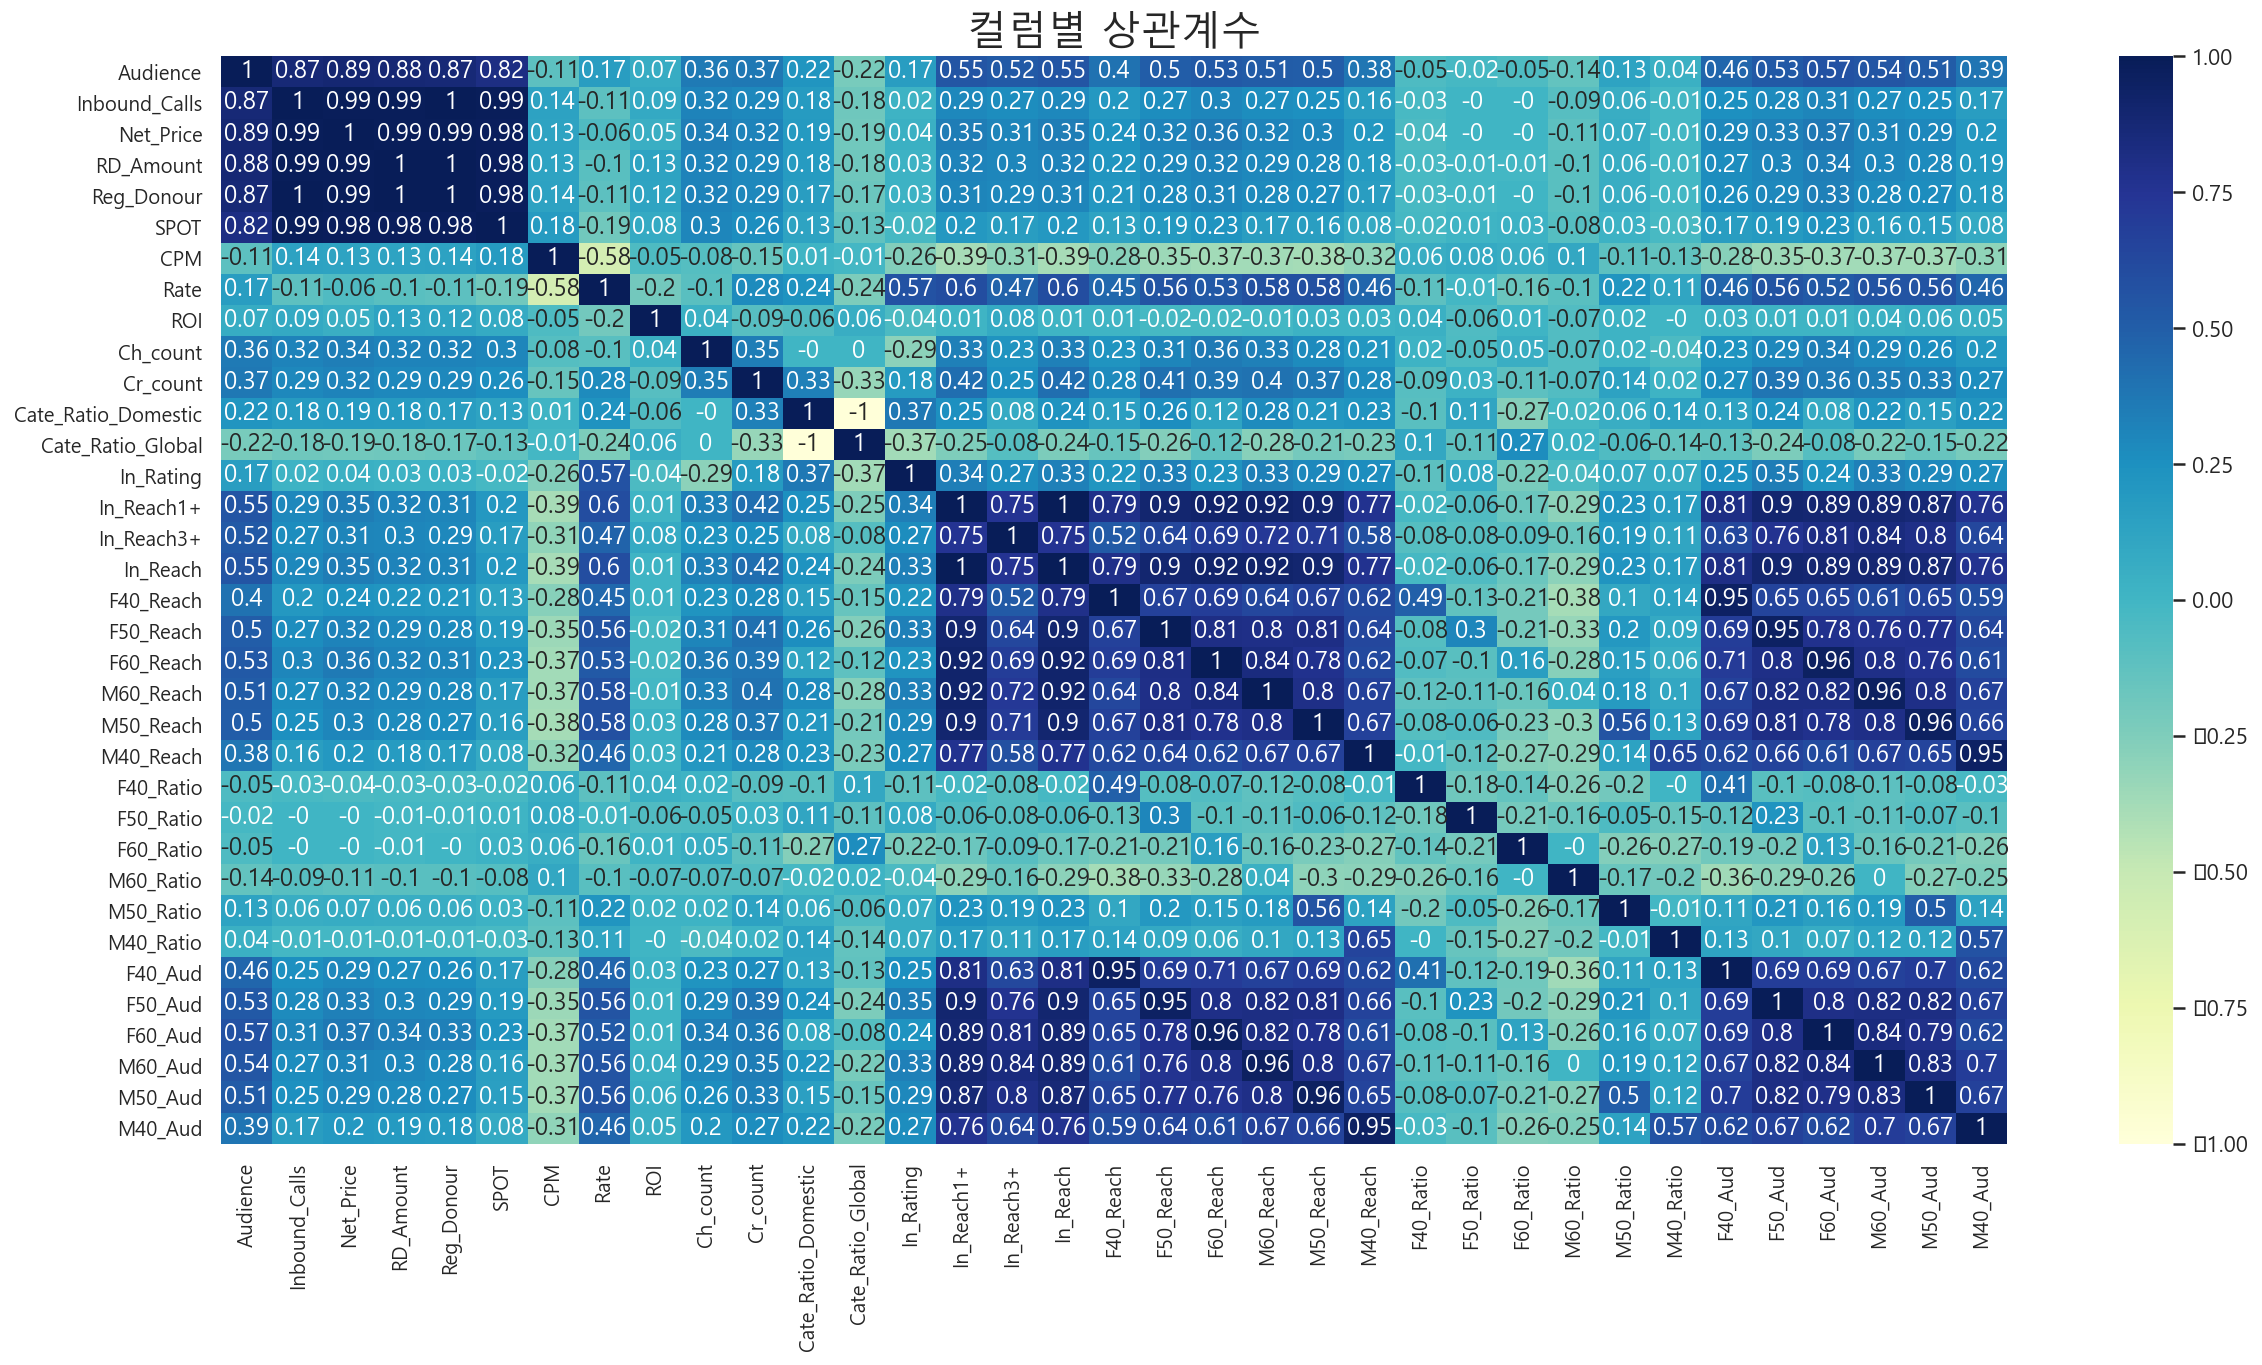

In [144]:
plt.figure(figsize=(20,10))
plt.title("컬럼별 상관계수", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.heatmap(data=round(df_fn2.corr(),2), annot=True, cmap="YlGnBu", annot_kws={"size": 12})
plt.show()

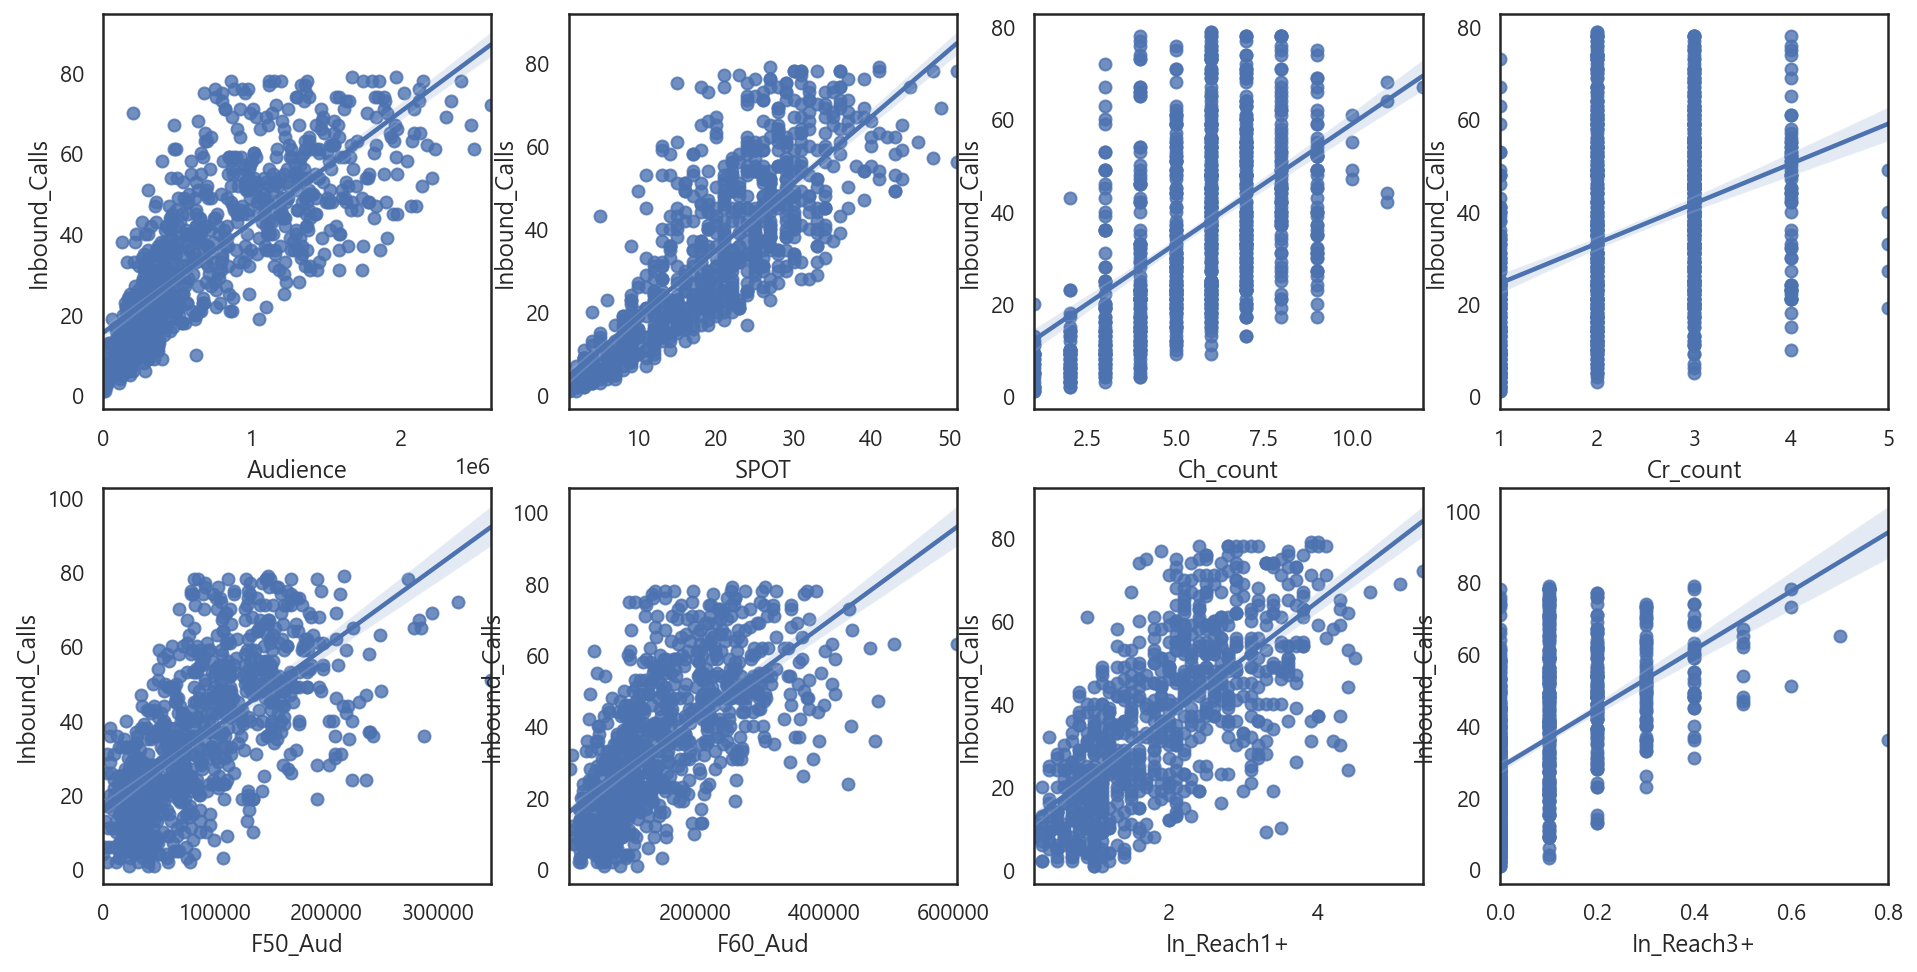

In [197]:
df_fn2 = df_fn2[df_fn2['Inbound_Calls']<80]

fig,axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['Audience', 'SPOT', 'Ch_count', 'Cr_count','F50_Aud', 'F60_Aud', 'In_Reach1+', 'In_Reach3+']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='Inbound_Calls', data=df_fn2, ax=axs[row][col])

In [198]:
sck_pd = df_fn2[['Audience', 'SPOT', 'Ch_count', 'Cr_count','F50_Aud', 'F60_Aud', 'In_Reach1+', 'In_Reach3+', 'Inbound_Calls']]
sck_pd.head(10)

,Audience,SPOT,Ch_count,Cr_count,F50_Aud,F60_Aud,In_Reach1+,In_Reach3+,Inbound_Calls
0,66914,7,5,3,128505,194485,2.1,0.2,13
1,70638,5,4,3,74418,126598,1.6,0.1,6
2,59670,12,5,2,108124,131251,1.8,0.0,19
3,138597,16,7,3,36320,210997,2.3,0.2,13
4,324304,23,6,3,24131,103126,2.1,0.1,22
5,113690,10,5,3,29235,95472,1.6,0.1,15
6,358932,17,5,1,142497,189291,1.9,0.1,21
7,248010,17,5,1,110601,220639,2.1,0.1,24
8,90231,14,7,3,86529,208630,2.1,0.0,13
9,197091,15,5,2,74648,152418,1.5,0.0,22


In [151]:
# Inbound_Calls에 대한 histgram

In [199]:
import plotly.express as px

fig = px.histogram(sck_pd, x="Inbound_Calls")
fig.show()

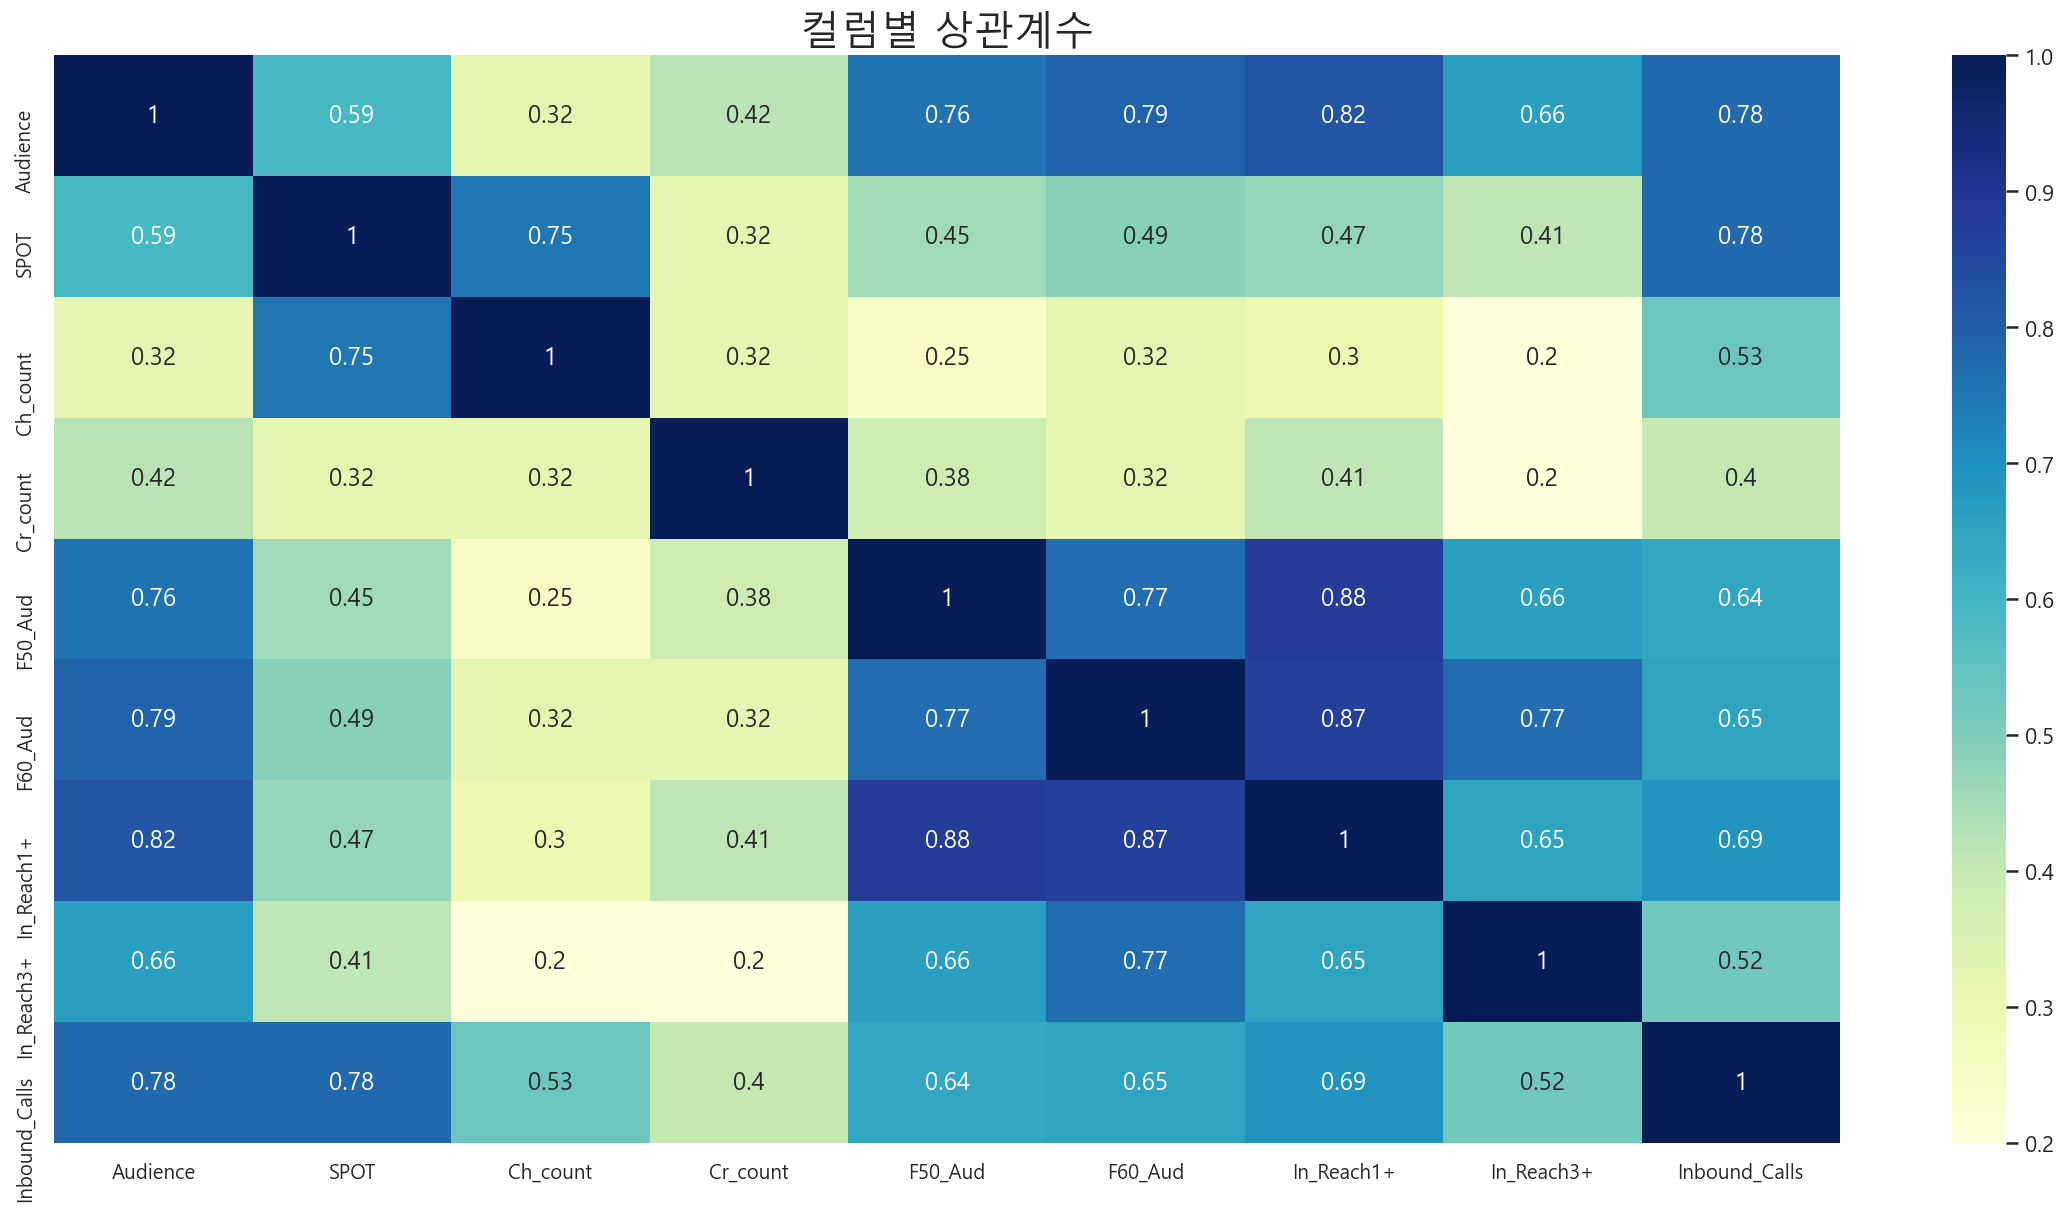

In [206]:
plt.figure(figsize=(20,10))
plt.title("컬럼별 상관계수", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.heatmap(data=round(sck_pd.corr(),2), annot=True, cmap="YlGnBu", annot_kws={"size": 12})
plt.show()

In [200]:
from sklearn.model_selection import train_test_split

X = sck_pd.drop('Inbound_Calls', axis=1)
y = sck_pd['Inbound_Calls']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

In [201]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [202]:
# RMS로 모델 평가

In [203]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Datea : ', rmse_test)

RMSE of Train Data :  9.290274008361063
RMSE of Test Datea :  9.393801384281552


In [204]:
# 성능확인

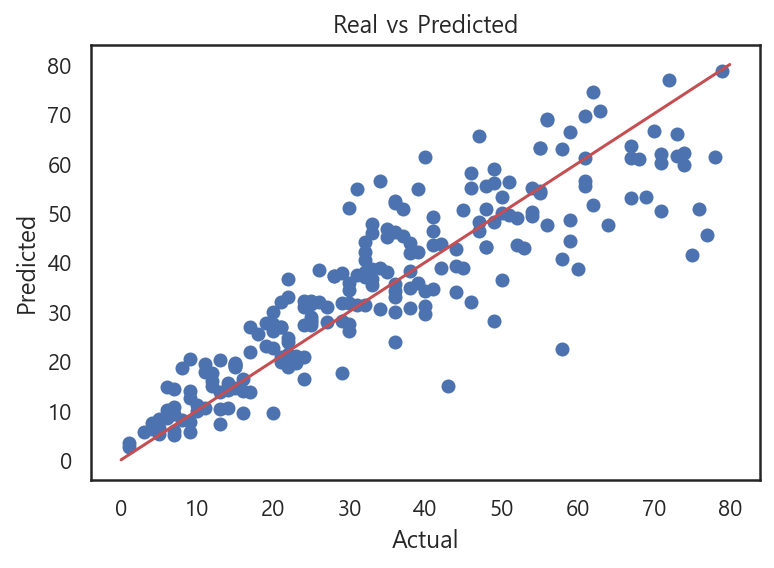

In [205]:
plt.scatter(y_test, pred_test)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Real vs Predicted")
plt.plot([0,80], [0,80], 'r')
plt.show()

In [216]:
sck_pd2 = df_fn2[['Audience', 'SPOT', 'F60_Aud', 'In_Reach1+', 'Inbound_Calls']]
sck_pd2.head(10)

,Audience,SPOT,F60_Aud,In_Reach1+,Inbound_Calls
0,66914,7,194485,2.1,13
1,70638,5,126598,1.6,6
2,59670,12,131251,1.8,19
3,138597,16,210997,2.3,13
4,324304,23,103126,2.1,22
5,113690,10,95472,1.6,15
6,358932,17,189291,1.9,21
7,248010,17,220639,2.1,24
8,90231,14,208630,2.1,13
9,197091,15,152418,1.5,22


In [217]:
import plotly.express as px

fig = px.histogram(sck_pd2, x="Inbound_Calls")
fig.show()

In [218]:
from sklearn.model_selection import train_test_split

X = sck_pd2.drop('Inbound_Calls', axis=1)
y = sck_pd2['Inbound_Calls']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

In [219]:
from sklearn.linear_model import LinearRegression

reg1 = LinearRegression()
reg1.fit(X_train, y_train)

LinearRegression()

In [220]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg1.predict(X_train)
pred_test = reg1.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Datea : ', rmse_test)

RMSE of Train Data :  9.304341804625262
RMSE of Test Datea :  9.35091395401219


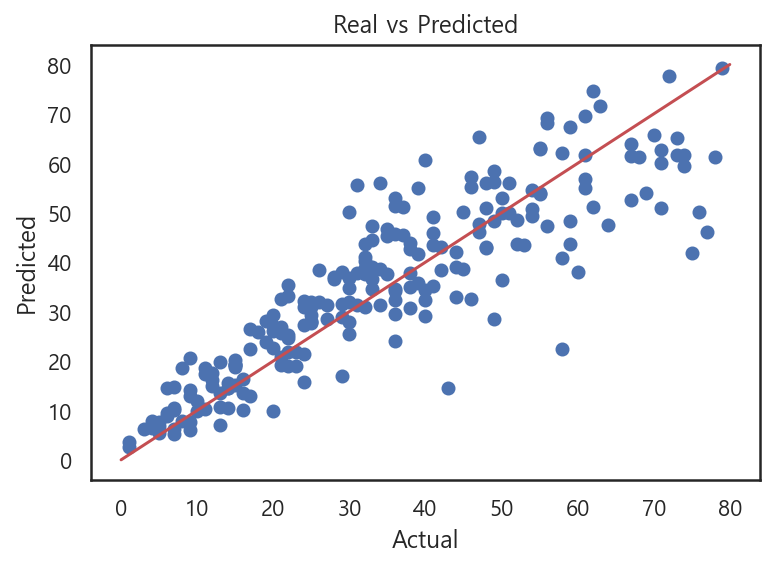

In [221]:
plt.scatter(y_test, pred_test)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Real vs Predicted")
plt.plot([0,80], [0,80], 'r')
plt.show()

In [222]:
import statsmodels.api as sm

lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Inbound_Calls   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                              3068.
Date:                Thu, 13 May 2021   Prob (F-statistic):                        0.00
Time:                        02:03:20   Log-Likelihood:                         -2405.7
No. Observations:                 659   AIC:                                      4819.
Df Residuals:                     655   BIC:                                      4837.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Audience     1.28e-05   1.18e-06     10.851      0.000    1.05e-05    1.51e-05
SPOT           1.0243      0.037     27.318      0.000       0.951       1.098
F60_Aud    -1.804e-05   8.23e-06     -2.193      0.029   -3.42e-05   -1.88e-06
In_Reach1+     4.3915      0.768      5.719      0.000       2.884       5.899
==============================================================================
Omnibus:                      122.934   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.300
Skew:                           1.043   Prob(JB):                     4.45e-55
Kurtosis:                       5.183   Cond. No.                     2.01e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [227]:
sck_pd3 = df_fn2[['Audience', 'SPOT','Inbound_Calls']]
sck_pd3.head(10)

,Audience,SPOT,Inbound_Calls
0,66914,7,13
1,70638,5,6
2,59670,12,19
3,138597,16,13
4,324304,23,22
5,113690,10,15
6,358932,17,21
7,248010,17,24
8,90231,14,13
9,197091,15,22


In [228]:
from sklearn.model_selection import train_test_split

X = sck_pd3.drop('Inbound_Calls', axis=1)
y = sck_pd3['Inbound_Calls']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

In [231]:
from sklearn.linear_model import LinearRegression

reg2 = LinearRegression()
reg2.fit(X_train, y_train)

LinearRegression()

In [232]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg2.predict(X_train)
pred_test = reg2.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Datea : ', rmse_test)

RMSE of Train Data :  9.554144463966379
RMSE of Test Datea :  9.757949082052413


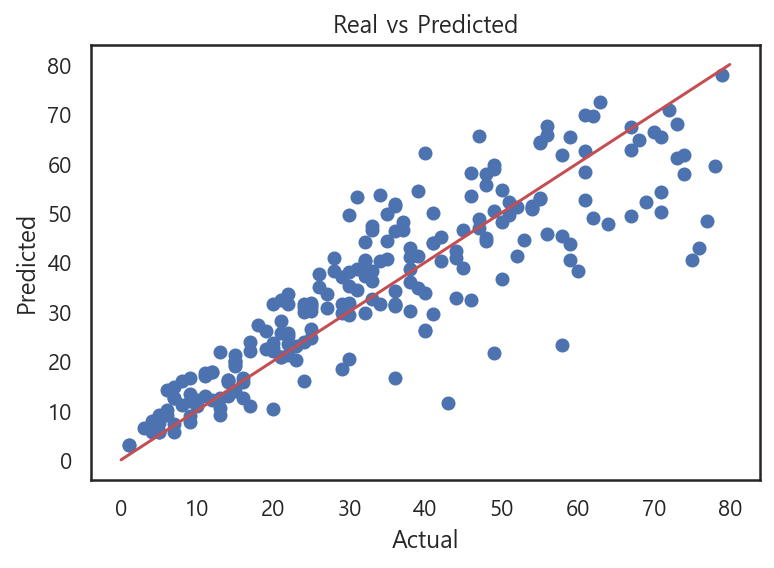

In [233]:
plt.scatter(y_test, pred_test)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Real vs Predicted")
plt.plot([0,80], [0,80], 'r')
plt.show()

In [234]:
import statsmodels.api as sm

lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Inbound_Calls   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              5790.
Date:                Thu, 13 May 2021   Prob (F-statistic):                        0.00
Time:                        02:18:09   Log-Likelihood:                         -2424.8
No. Observations:                 659   AIC:                                      4854.
Df Residuals:                     657   BIC:                                      4863.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Audience    1.681e-05    8.3e-07     20.246      0.000    1.52e-05    1.84e-05
SPOT           1.1254      0.034     32.965      0.000       1.058       1.192
==============================================================================
Omnibus:                      130.257   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.418
Skew:                           1.061   Prob(JB):                     8.64e-64
Kurtosis:                       5.464   Cond. No.                     8.57e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [235]:
sck_pd4 = df_fn2[['Audience','Inbound_Calls']]
sck_pd4.head(10)

,Audience,Inbound_Calls
0,66914,13
1,70638,6
2,59670,19
3,138597,13
4,324304,22
5,113690,15
6,358932,21
7,248010,24
8,90231,13
9,197091,22


In [236]:
from sklearn.model_selection import train_test_split

X = sck_pd4.drop('Inbound_Calls', axis=1)
y = sck_pd4['Inbound_Calls']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

In [237]:
from sklearn.linear_model import LinearRegression

reg3 = LinearRegression()
reg3.fit(X_train, y_train)

LinearRegression()

In [239]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg3.predict(X_train)
pred_test = reg3.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Datea : ', rmse_test)

RMSE of Train Data :  12.54503091276687
RMSE of Test Datea :  12.218963721066315


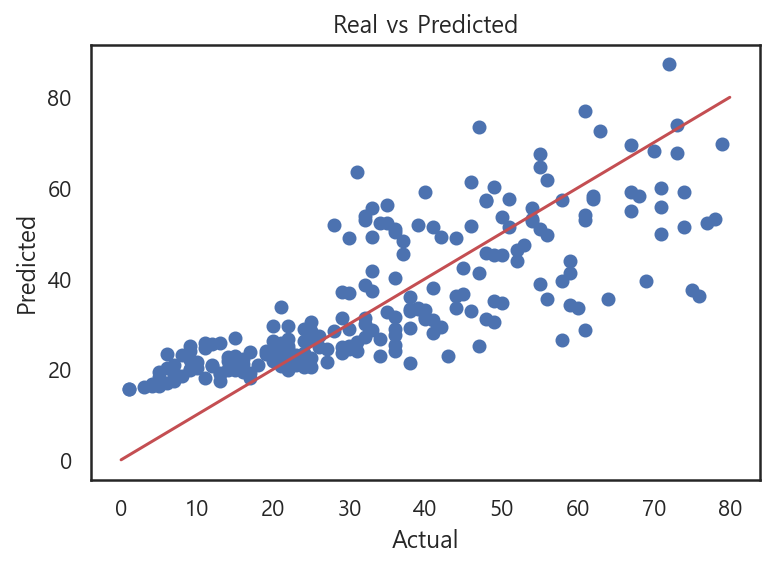

In [240]:
plt.scatter(y_test, pred_test)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Real vs Predicted")
plt.plot([0,80], [0,80], 'r')
plt.show()

In [241]:
import statsmodels.api as sm

lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Inbound_Calls   R-squared (uncentered):                   0.857
Model:                            OLS   Adj. R-squared (uncentered):              0.857
Method:                 Least Squares   F-statistic:                              3960.
Date:                Thu, 13 May 2021   Prob (F-statistic):                   1.35e-280
Time:                        02:20:22   Log-Likelihood:                         -2746.4
No. Observations:                 659   AIC:                                      5495.
Df Residuals:                     658   BIC:                                      5499.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Audience    4.082e-05   6.49e-07     62.925      0.000    3.95e-05    4.21e-05
==============================================================================
Omnibus:                       18.269   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.207
Skew:                          -0.201   Prob(JB):                     2.76e-07
Kurtosis:                       3.969   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [242]:
sck_pd = df_fn2[['Audience', 'SPOT', 'Ch_count', 'Cr_count','F50_Aud', 'F60_Aud', 'In_Reach1+', 'In_Reach3+', 'Inbound_Calls']]
sck_pd.head(10)

,Audience,SPOT,Ch_count,Cr_count,F50_Aud,F60_Aud,In_Reach1+,In_Reach3+,Inbound_Calls
0,66914,7,5,3,128505,194485,2.1,0.2,13
1,70638,5,4,3,74418,126598,1.6,0.1,6
2,59670,12,5,2,108124,131251,1.8,0.0,19
3,138597,16,7,3,36320,210997,2.3,0.2,13
4,324304,23,6,3,24131,103126,2.1,0.1,22
5,113690,10,5,3,29235,95472,1.6,0.1,15
6,358932,17,5,1,142497,189291,1.9,0.1,21
7,248010,17,5,1,110601,220639,2.1,0.1,24
8,90231,14,7,3,86529,208630,2.1,0.0,13
9,197091,15,5,2,74648,152418,1.5,0.0,22


In [244]:
from sklearn.model_selection import train_test_split

X = sck_pd.drop('Inbound_Calls', axis=1)
y = sck_pd['Inbound_Calls']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

In [245]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [246]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Datea : ', rmse_test)

RMSE of Train Data :  9.290274008361063
RMSE of Test Datea :  9.393801384281552


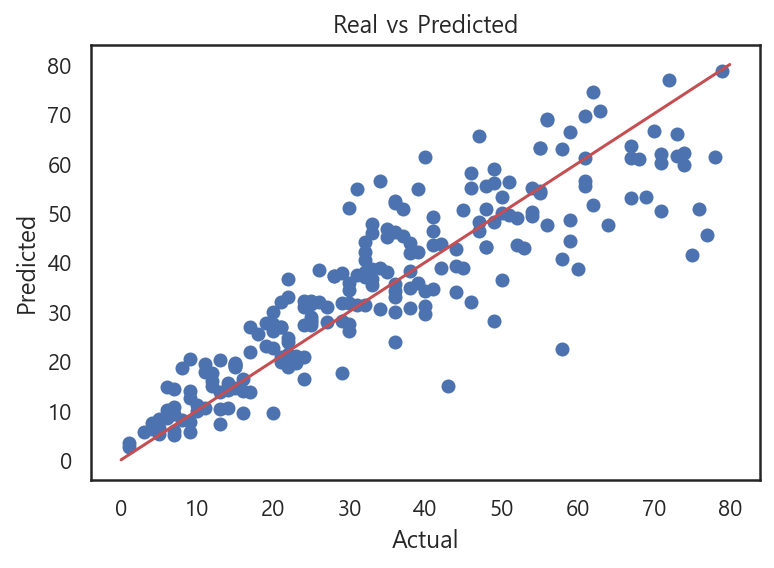

In [247]:
plt.scatter(y_test, pred_test)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Real vs Predicted")
plt.plot([0,80], [0,80], 'r')
plt.show()

In [248]:
import statsmodels.api as sm

lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Inbound_Calls   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                              1528.
Date:                Thu, 13 May 2021   Prob (F-statistic):                        0.00
Time:                        02:23:13   Log-Likelihood:                         -2405.0
No. Observations:                 659   AIC:                                      4826.
Df Residuals:                     651   BIC:                                      4862.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Audience    1.243e-05   1.32e-06      9.407      0.000    9.83e-06     1.5e-05
SPOT           1.0667      0.070     15.267      0.000       0.930       1.204
Ch_count      -0.2352      0.274     -0.858      0.391      -0.773       0.303
Cr_count       0.2607      0.412      0.633      0.527      -0.548       1.070
F50_Aud     -1.06e-05   1.38e-05     -0.767      0.443   -3.77e-05    1.65e-05
F60_Aud    -1.849e-05    9.6e-06     -1.926      0.055   -3.73e-05    3.61e-07
In_Reach1+     4.9154      1.069      4.599      0.000       2.817       7.014
In_Reach3+     1.3563      4.785      0.283      0.777      -8.039      10.751
==============================================================================
Omnibus:                      120.968   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.889
Skew:                           1.025   Prob(JB):                     1.48e-54
Kurtosis:                       5.198   Cond. No.                     1.26e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
### R스퀘어는 Audience, SPOT, In_Reach1+, F60_Aud로 -> 0.949 최대치 | Audience만으로 예측할 때 0.89에서 성능개선
### 해당 Feature의 RMSE는 9.3 | Audience만으로 예측할때 12.5에서 성능개선